In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from maddpg import MADDPG
from ddpg import ReplayBuffer
from IPython.display import display, clear_output
from collections import deque
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")        
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
action_space = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.flatten().shape[0]
obs_size = states.shape[1]

num_agents = len(env_info.agents)
print("No. Agents", num_agents, "State Size ", state_size, "Action Space ", action_space)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


No. Agents 2 State Size  48 Action Space  2


In [3]:
maddpg = MADDPG(state_size, obs_size, action_space, num_agents)

In [4]:
buffer = ReplayBuffer()
num_episodes = 10000
update_every = 1
scores = []
scores_avg_window = deque(maxlen=100)
scores_avg = []
save_every = 100

for episode in range(1, num_episodes+1):
    for agent in maddpg.maddpg_agent:
        agent.noise.reset()
    clear_output(wait=True)
    env_info = env.reset(train_mode=True)[brain_name] 
    obs = env_info.vector_observations
    state = obs.flatten()                       
    local_scores = np.zeros(num_agents)                          
    while True:
        actions = maddpg.act(obs)
        actions = [ a.cpu().data.numpy() for a in actions]
        actions_ = np.clip(actions, -1, 1)
        env_info_ = env.step(actions_)[brain_name]        
        next_obs = env_info_.vector_observations           
        next_state = next_obs.flatten()
        rewards = env_info_.rewards                             
        dones = env_info_.local_done   
        buffer.insert(obs, state, actions, rewards, next_obs, next_state, dones)
        local_scores += rewards
        obs, state = next_obs, next_state
        if len(buffer) > 1024 and episode%update_every==0:
            for id_ag in range(num_agents):
                samples = buffer.sample()
                maddpg.update(samples, id_ag)
            maddpg.soft_update_targets() 
        if np.any(dones): 
            break
    episode_reward = np.max(local_scores)
    scores.append(episode_reward)
    scores_avg_window.append(episode_reward)
    scores_avg.append(np.mean(scores_avg_window))
    print('Episode {}: Average Score {}, Score (max over agents) {}'.format(episode, 
                                                                            np.mean(scores_avg_window), 
                                                                            np.max(scores)))

    if save_every%episode ==0:
        print("Saving checkpoint")
        for agent_id, agente in enumerate(maddpg.maddpg_agent):
            torch.save(agente.actor.state_dict(),         'ckpt_actor_{}.pth'.format(agent_id))
            torch.save(agente.target_actor.state_dict(),  'ckpt_target_actor_{}.pth'.format(agent_id))
            torch.save(agente.critic.state_dict(),        'ckpt_critic_{}.pth'.format(agent_id))
            torch.save(agente.target_critic.state_dict(), 'ckpt_target_critic_{}.pth'.format(agent_id))
        
    if np.mean(scores_avg_window)>=0.5 and len(scores_avg) >= 100:
        print("Task completed at episode {}".format(episode))
        print("#############Saving successful agents#############")
        for agent_id, agente in enumerate(maddpg.maddpg_agent):
            torch.save(agente.actor.state_dict(), 'success_ckpt_actor_{}.pth'.format(agent_id))
            torch.save(agente.target_actor.state_dict(), 'success_ckpt_target_actor_{}.pth'.format(agent_id))
            torch.save(agente.critic.state_dict(),'success_ckpt_critic_{}.pth'.format(agent_id))
            torch.save(agente.target_critic.state_dict(),'success_ckpt_target_critic_{}.pth'.format(agent_id))

KeyboardInterrupt: 

# There is a KeyboardInterrupt error above because I stoped the training killing the cell once I saw that the agent was fully trained and was taking longer than I expected :)

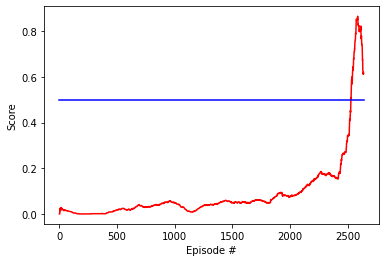

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg, 'r-')
plt.plot( [0, len(scores_avg)+1], [0.5, 0.5], 'b-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

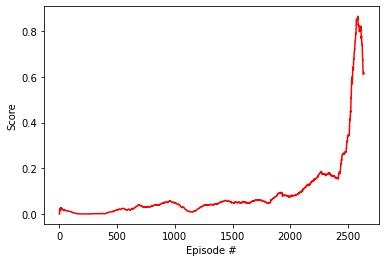

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg, 'r-')
#plt.plot( [0, len(scores_avg)+1], [0.5, 0.5], 'b-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

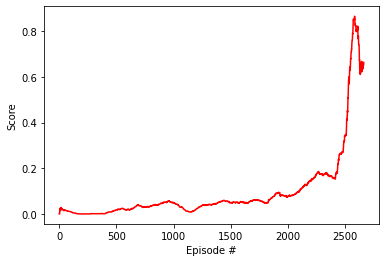

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg, 'r-')
#plt.plot( [0, len(scores_avg)+1], [0.5, 0.5], 'b-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [17]:
scores_avg[2420:]

[0.17660000268369913,
 0.18160000275820493,
 0.1826000027731061,
 0.1826000027731061,
 0.18160000275820493,
 0.17860000271350146,
 0.17960000272840262,
 0.17960000272840262,
 0.17960000272840262,
 0.18170000275596976,
 0.17770000269636513,
 0.17770000269636513,
 0.18460000280290842,
 0.18660000283271075,
 0.200600003041327,
 0.20860000316053628,
 0.21960000332444907,
 0.21960000332444907,
 0.21960000332444907,
 0.21660000327974557,
 0.23260000351816415,
 0.23360000353306531,
 0.23860000360757114,
 0.23360000353306531,
 0.23360000353306531,
 0.23860000360757114,
 0.2506000037863851,
 0.2546000038459897,
 0.25860000390559434,
 0.2606000039353967,
 0.25960000392049554,
 0.2595000039227307,
 0.2595000039227307,
 0.2595000039227307,
 0.2606000039353967,
 0.26170000394806264,
 0.26170000394806264,
 0.2657000040076673,
 0.26470000399276616,
 0.26370000397786497,
 0.26370000397786497,
 0.26480000399053094,
 0.26480000399053094,
 0.26470000399276616,
 0.26170000394806264,
 0.26170000394806264,


In [8]:
env.close()